In [5]:
import os
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [6]:
os.chdir("/content/drive/MyDrive/TextAnalytics - AMI 2020/dataset")

In [7]:
def plot_cfmatrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  rcParams['figure.figsize'] = 10,9

  plt.show()

In [8]:
## TRAINING SET
ami_csv = "training_set_cleaned.csv"
df = pd.read_csv(ami_csv)

In [23]:
## TEST SET
ami_test = "AMI2020_test_raw_gold_anon.tsv"
test = pd.read_csv(ami_test, sep = "\t")

In [22]:
train, val = train_test_split(df, 
                                stratify=df['target'],
                                test_size=0.2, random_state=42)

In [25]:
df_text = df["final_text_tag"]
test_text = test["text"]
y_agr_df = df["aggressiveness"]
y_mys_df = df["misogynous"]

y_agr_exttest = test["aggressiveness"]
y_mys_exttest = test["misogynous"]

In [26]:
# TRAIN SET
X_train = train["final_text_tag"]
y_agr_train = train["aggressiveness"]
y_mys_train = train["misogynous"]
y_multiclass_train = train["target"]

# VAL SET
X_val = val["final_text_tag"]
y_agr_val = val["aggressiveness"]
y_mys_val = val["misogynous"]
y_multiclass_val = val["target"]

In [ ]:
X_train.shape,X_val.shape

((3077,), (1319,))

In [ ]:
size = len(y_agr_val[y_agr_val== 1])
print("Number of agr tweets = " +  str(size))
print("Percertage of agr tweets = " + str(round((size/len(y_agr_val) * 100),2)))
print("\t")
size = len(y_agr_val[y_agr_val== 0])
print("Number of non agr tweets = " +  str(size))
print("Percertage of non agr tweets = " + str(round((size/len(y_agr_val) * 100),2)))

Number of agr tweets = 471
Percertage of agr tweets = 35.71
	
Number of non agr tweets = 848
Percertage of non agr tweets = 64.29


In [20]:
# vectorize tweets, without any analyzer.  
# consider unigrams and bigrams
vect = CountVectorizer(min_df=5, ngram_range = (1,2))  

## 

vect.fit(X_train)
# create vector train
X_train_tok = vect.transform(X_train)

# validation
X_val_tok = vect.transform(X_val)

In [27]:
### for external test
vect = CountVectorizer(min_df=5, ngram_range = (1,2))  

vect.fit(df_text)

X_df_tok = vect.transform(df_text)

X_testext_tok = vect.transform(test_text)

In [ ]:
print(X_train_tok)

  (0, 365)	1
  (0, 643)	1
  (0, 662)	1
  (0, 864)	1
  (0, 866)	1
  (0, 927)	1
  (1, 643)	1
  (1, 1011)	1
  (2, 53)	1
  (2, 180)	1
  (2, 187)	1
  (2, 275)	1
  (2, 372)	1
  (2, 398)	1
  (2, 643)	1
  (2, 654)	1
  (2, 820)	1
  (2, 891)	1
  (3, 70)	1
  (3, 180)	2
  (3, 721)	1
  (3, 810)	1
  (3, 832)	2
  (3, 864)	1
  (3, 866)	1
  :	:
  (3511, 51)	1
  (3511, 62)	1
  (3511, 64)	1
  (3511, 298)	1
  (3511, 308)	1
  (3511, 606)	1
  (3511, 802)	1
  (3511, 891)	1
  (3511, 1056)	1
  (3511, 1218)	1
  (3511, 1238)	1
  (3512, 43)	1
  (3512, 1218)	1
  (3512, 1239)	1
  (3513, 643)	1
  (3513, 1195)	1
  (3514, 540)	1
  (3514, 643)	1
  (3514, 864)	1
  (3514, 866)	1
  (3514, 927)	1
  (3515, 864)	1
  (3515, 866)	1
  (3515, 927)	1
  (3515, 1101)	1


In [ ]:
print(X_train_tok.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X_val_tok)

  (0, 255)	1
  (0, 438)	1
  (0, 441)	1
  (0, 586)	1
  (0, 638)	1
  (0, 916)	1
  (1, 32)	1
  (1, 253)	1
  (1, 736)	1
  (1, 856)	1
  (1, 858)	1
  (1, 870)	1
  (1, 919)	1
  (2, 205)	1
  (2, 207)	1
  (2, 324)	1
  (2, 394)	1
  (2, 725)	1
  (2, 727)	1
  (2, 856)	1
  (2, 858)	1
  (2, 919)	1
  (2, 1030)	1
  (2, 1098)	1
  (2, 1118)	1
  :	:
  (876, 858)	1
  (876, 919)	1
  (877, 101)	1
  (877, 102)	1
  (877, 277)	1
  (877, 638)	1
  (877, 643)	1
  (878, 95)	1
  (878, 139)	1
  (878, 181)	1
  (878, 193)	1
  (878, 212)	1
  (878, 563)	1
  (878, 856)	1
  (878, 858)	1
  (878, 919)	1
  (878, 999)	1
  (879, 394)	1
  (879, 464)	1
  (879, 638)	1
  (879, 699)	1
  (879, 856)	1
  (879, 858)	1
  (879, 919)	1
  (879, 1137)	1


In [ ]:
len(vect.vocabulary_)

1318

In [ ]:
vect.get_feature_names_out()[1]

'accanto'

Naive Bayes Classifier

In [ ]:
# we build a pipeline object with tokenization. Without hypers. tuning 

bayes_pip = Pipeline([
    ('sel', SelectKBest(chi2, k=800)), 
    ('tfidf', TfidfTransformer()),  
    ('learner', MultinomialNB()) 
])

In [ ]:
# mys
bayes_pip.fit(X_train_tok,y_mys_train)

bay_pred_mys= bayes_pip.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, bay_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, bay_pred_mys)
print('Confusion matrix:')
print(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       706
           1       0.89      0.86      0.87       613

    accuracy                           0.88      1319
   macro avg       0.88      0.88      0.88      1319
weighted avg       0.88      0.88      0.88      1319

Confusion matrix:
[[638  68]
 [ 88 525]]


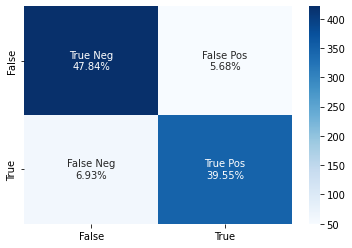

In [ ]:
plot_cfmatrix(cf_matrix)

In [ ]:
# agressive -- 1 
bayes_pip.fit(X_train_tok,y_agr_train)

bay_pred_agr= bayes_pip.predict(X_val_tok)

In [ ]:
print('Classification report:')
print(classification_report(y_agr_val, bay_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val, bay_pred_agr)
print(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       848
           1       0.74      0.68      0.71       471

    accuracy                           0.80      1319
   macro avg       0.78      0.77      0.78      1319
weighted avg       0.80      0.80      0.80      1319

Confusion matrix:
[[734 114]
 [149 322]]


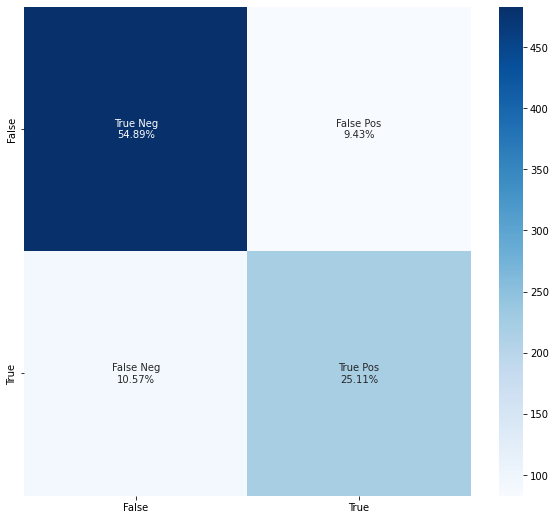

In [ ]:
plot_cfmatrix(cf_matrix)

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
bayes_pip.fit(X_train_tok,y_agr_train)

X_val_tok_agr= X_val_tok[bay_pred_mys==1]

bay_pred_agr= bayes_pip.predict(X_val_tok_agr)

In [ ]:
print('Classification report:')
print(classification_report(y_agr_val[bay_pred_mys==1], bay_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[bay_pred_mys==1], bay_pred_agr)
print(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       195
           1       0.74      0.80      0.77       398

    accuracy                           0.67       593
   macro avg       0.62      0.61      0.61       593
weighted avg       0.66      0.67      0.66       593

Confusion matrix:
[[ 82 113]
 [ 81 317]]


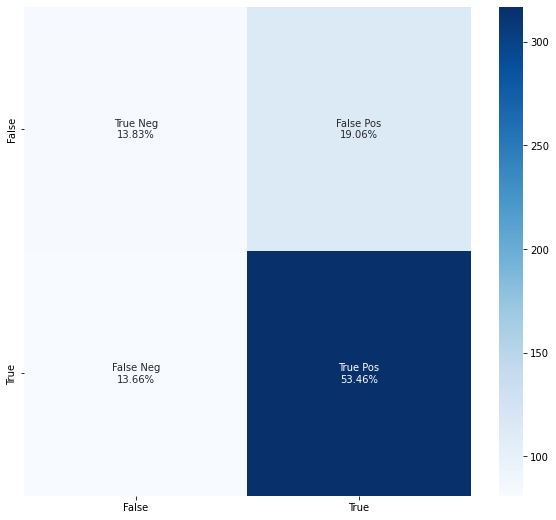

In [ ]:
plot_cfmatrix(cf_matrix)

####Hyperparameters Tuning

In [ ]:
SelectKBest().get_params().keys()

dict_keys(['k', 'score_func'])

In [ ]:
MultinomialNB().get_params().keys()

In [ ]:
bayes_pip= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2)),
                ("tfidf", TfidfTransformer()),
                ("clf", MultinomialNB())
                ])

In [ ]:
params_grid = {
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    "clf__alpha": (1.0,1e-1,1e-2, 1e-3),
    "selbestk__k": [i for i in range(480,520)]
}

In [ ]:
g_search = GridSearchCV(bayes_pip, params_grid, cv=5, scoring = "f1_macro", return_train_score=True)

g_search.fit(X_train_tok,y_mys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(k=485,
                                                    score_func=<function chi2 at 0x7f7126999830>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (1.0, 0.1, 0.01, 0.001),
                         'selbestk__k': [480, 485, 486, 487, 488, 489, 490,
                                         500],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
print("Best Parameter Combination For Mys task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Mys task:
{'clf__alpha': 1.0, 'selbestk__k': 485, 'tfidf__norm': 'l2', 'tfidf__use_idf': True}


In [ ]:
g_search = GridSearchCV(bayes_pip, params_grid, cv=5, scoring = "f1_macro", return_train_score=True)

g_search.fit(X_train_tok,y_agr_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(k=485,
                                                    score_func=<function chi2 at 0x7f7126999830>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (1.0, 0.1, 0.01, 0.001),
                         'selbestk__k': [480, 481, 482, 483, 484, 485, 486, 487,
                                         488, 489, 490, 491, 492, 493, 494, 495,
                                         496, 497, 498, 499, 500, 501, 502, 503,
                                         504, 505, 506, 507, 508, 509, ...],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
print("Best Parameter Combination For Agr task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Agr task:
{'clf__alpha': 0.1, 'selbestk__k': 515, 'tfidf__norm': 'l2', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(bayes_pip, params_grid, cv=5, scoring = "f1_macro", return_train_score=True)

g_search.fit(X_train_tok,y_multiclass_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(k=485,
                                                    score_func=<function chi2 at 0x7f7126999830>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (1.0, 0.1, 0.01, 0.001),
                         'selbestk__k': [480, 481, 482, 483, 484, 485, 486, 487,
                                         488, 489, 490, 491, 492, 493, 494, 495,
                                         496, 497, 498, 499, 500, 501, 502, 503,
                                         504, 505, 506, 507, 508, 509, ...],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             return_train_score=True, scoring='f1_macro')

In [ ]:
print("Best Parameter Combination For MultiClassification:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For MultiClassification:
{'clf__alpha': 0.01, 'selbestk__k': 500, 'tfidf__norm': 'l2', 'tfidf__use_idf': True}


#### Re trainin

In [ ]:
bayes_pip_opt_mys = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 485)),
                ("tfidf", TfidfTransformer()),
                ("clf", MultinomialNB(alpha = 1.0))
                ])

bayes_pip_opt_agr = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 515)),
                ("tfidf", TfidfTransformer(use_idf = False)),
                ("clf", MultinomialNB(alpha = 0.1))
                ])

bayes_pip_opt_mlc = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 500)),
                ("tfidf", TfidfTransformer()),
                ("clf", MultinomialNB(alpha = 0.01))
                ])

In [ ]:
# mys
bayes_pip_opt_mys.fit(X_train_tok,y_mys_train)

bay_pred_mys= bayes_pip_opt_mys.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, bay_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, bay_pred_mys)

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       471
           1       0.88      0.86      0.87       409

    accuracy                           0.88       880
   macro avg       0.88      0.88      0.88       880
weighted avg       0.88      0.88      0.88       880



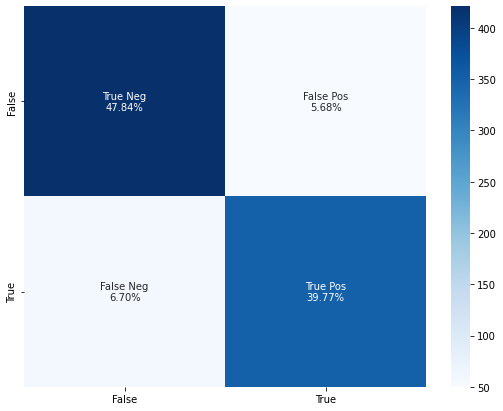

In [ ]:
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       566
           1       0.70      0.78      0.74       314

    accuracy                           0.80       880
   macro avg       0.78      0.80      0.79       880
weighted avg       0.81      0.80      0.80       880



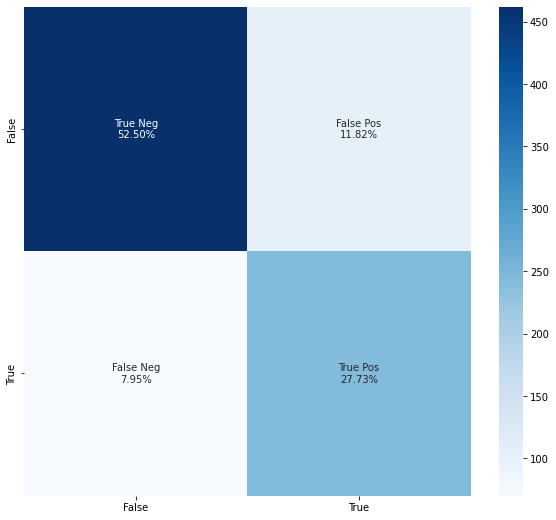

In [ ]:
# agressive -- 1 
bayes_pip_opt_agr.fit(X_train_tok,y_agr_train)

bay_pred_agr= bayes_pip_opt_agr.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_agr_val, bay_pred_agr))
cf_matrix = confusion_matrix(y_agr_val, bay_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.30       132
           1       0.70      0.90      0.78       267

    accuracy                           0.67       399
   macro avg       0.60      0.55      0.54       399
weighted avg       0.63      0.67      0.62       399

Confusion matrix:


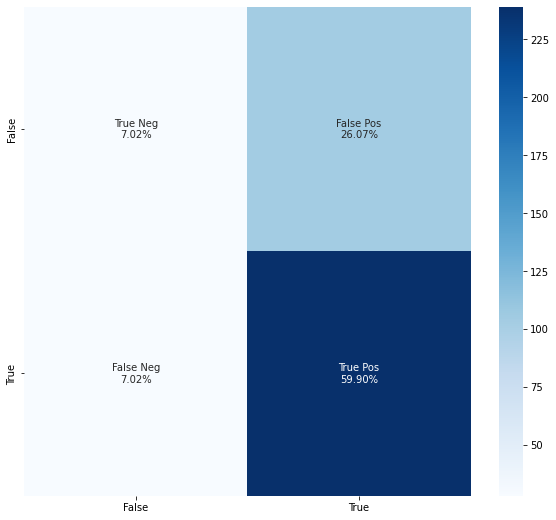

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
bayes_pip_opt_agr.fit(X_train_tok,y_agr_train)

X_val_tok_agr = X_val_tok[bay_pred_mys==1]

bay_pred_agr= bayes_pip_opt_agr.predict(X_val_tok_agr)

print('Classification report:')
print('Classification report:')
print(classification_report(y_agr_val[bay_pred_mys==1], bay_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[bay_pred_mys==1], bay_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       471
           1       0.52      0.33      0.40        95
           2       0.73      0.77      0.75       314

    accuracy                           0.79       880
   macro avg       0.71      0.67      0.68       880
weighted avg       0.78      0.79      0.78       880



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


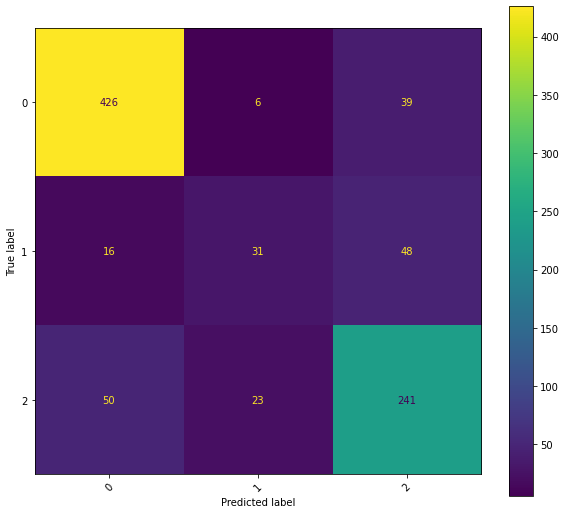

In [ ]:
# Multi Classification
bayes_pip_opt_mlc.fit(X_train_tok,y_multiclass_train)

bay_pred_mlc= bayes_pip_opt_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, bay_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, bay_pred_mlc)
plot_confusion_matrix(bayes_pip_opt_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()

# Logistic Regression

#### hyperparameters tuning

In [16]:
lr_pip= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2)),
                ("tfidf", TfidfTransformer()),
                ("lg",  LogisticRegression())
                ])

In [ ]:
params_grid = {
  'tfidf__use_idf': (True, False),
  'tfidf__norm': ('l1', 'l2'),
  'lg__C' : np.logspace(-4, 4, 50),
  'lg__penalty' : ['l1', 'l2', 'elasticnet'],
  "selbestk__k" : [400, 450, 500, 550, 600, 650, 700]
}

In [ ]:
g_search = GridSearchCV(lr_pip, params_grid, cv=5, scoring = "f1_macro", n_jobs=3)

g_search.fit(X_train_tok,y_mys_train)

In [ ]:
print("Best Parameter Combination For Mys task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Mys task:
{'lg__C': 1.2067926406393288, 'lg__penalty': 'l2', 'selbestk__k': 450, 'tfidf__norm': 'l2', 'tfidf__use_idf': True}


In [ ]:
g_search = GridSearchCV(lr_pip, params_grid, cv=5, scoring = "f1_macro", n_jobs=3)

g_search.fit(X_train_tok,y_agr_train)

In [ ]:
print("Best Parameter Combination For Agr task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Agr task:
{'lg__C': 11.513953993264458, 'lg__penalty': 'l2', 'selbestk__k': 700, 'tfidf__norm': 'l1', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(lr_pip, params_grid, cv=5, scoring = "f1_macro", n_jobs = 3)

g_search.fit(X_train_tok,y_multiclass_train)

In [ ]:
print("Best Parameter Combination For MultiClass task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For MultiClass task:
{'lg__C': 3.727593720314938, 'lg__penalty': 'l2', 'selbestk__k': 700, 'tfidf__norm': 'l2', 'tfidf__use_idf': False}


#### Re train

In [28]:
lr_pip_mys= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 450)),
                ("tfidf", TfidfTransformer()),
                ("lr",  LogisticRegression(C= 1.206, penalty = 'l2', max_iter=500))
                ])

lr_pip_agr = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 700)),
                ("tfidf", TfidfTransformer(use_idf = False, norm = 'l1')),
                ("lr", LogisticRegression(C= 11.513, penalty = 'l2',max_iter=500))
                ])

lr_pip_mlc = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 700)),
                ("tfidf", TfidfTransformer(use_idf = False)),
                ("lr", LogisticRegression(C = 3.72, penalty = 'l2', max_iter=500))
                ])

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       706
           1       0.88      0.92      0.90       613

    accuracy                           0.90      1319
   macro avg       0.90      0.90      0.90      1319
weighted avg       0.90      0.90      0.90      1319



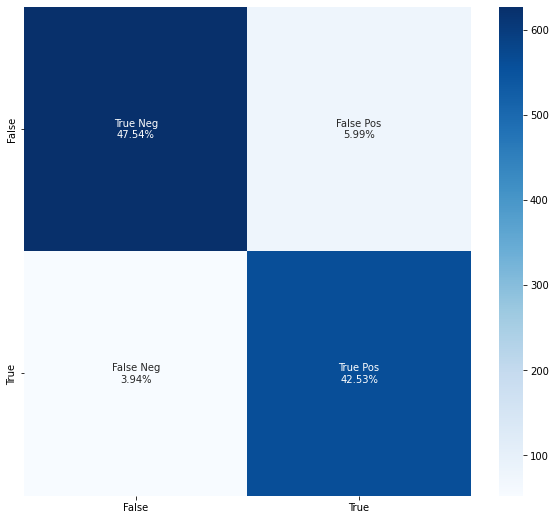

In [ ]:
# mys
lr_pip_mys.fit(X_train_tok,y_mys_train)

lr_pred_mys= lr_pip_mys.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, lr_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, lr_pred_mys)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       848
           1       0.75      0.73      0.74       471

    accuracy                           0.82      1319
   macro avg       0.80      0.80      0.80      1319
weighted avg       0.82      0.82      0.82      1319



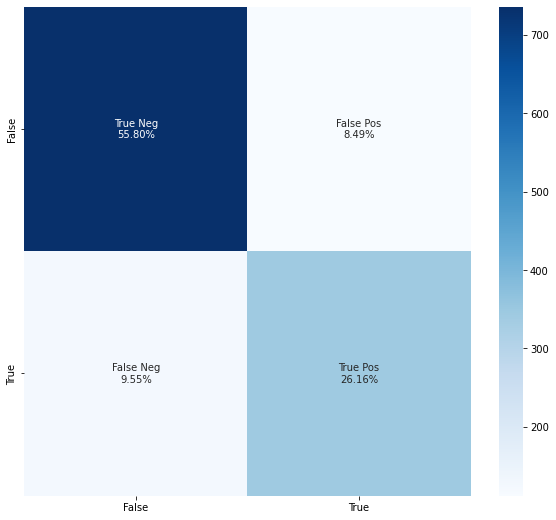

In [ ]:
# agressive -- 1 
lr_pip_agr.fit(X_train_tok,y_agr_train)

lr_pred_agr= lr_pip_agr.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_agr_val, lr_pred_agr))
cf_matrix = confusion_matrix(y_agr_val, lr_pred_agr)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       211
           1       0.77      0.79      0.78       429

    accuracy                           0.70       640
   macro avg       0.66      0.65      0.65       640
weighted avg       0.69      0.70      0.70       640

Confusion matrix:


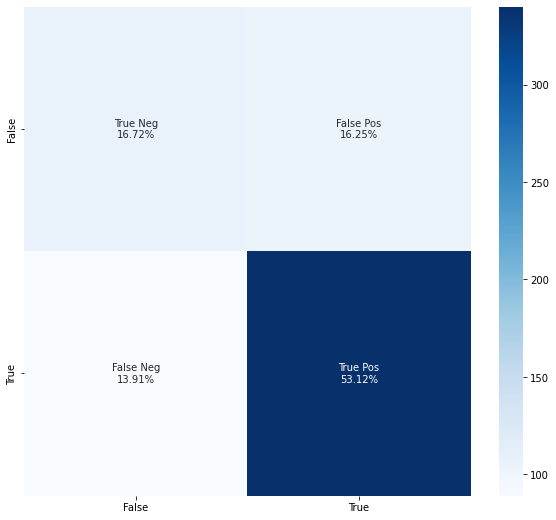

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
lr_pip_agr.fit(X_train_tok,y_agr_train)

X_val_tok_agr= X_val_tok[lr_pred_mys==1]

lr_pred_agr= lr_pip_agr.predict(X_val_tok_agr)

print('Classification report:')
print(classification_report(y_agr_val[lr_pred_mys==1], lr_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[lr_pred_mys==1], lr_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       706
           1       0.53      0.35      0.42       142
           2       0.73      0.80      0.76       471

    accuracy                           0.81      1319
   macro avg       0.72      0.68      0.69      1319
weighted avg       0.80      0.81      0.80      1319



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


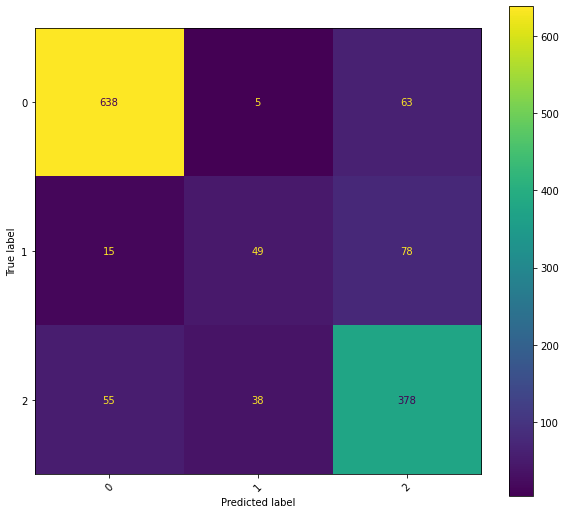

In [ ]:
# Multi Classification
lr_pip_mlc.fit(X_train_tok,y_multiclass_train)

lr_pred_mlc= lr_pip_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, lr_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, lr_pred_mlc)
plot_confusion_matrix(lr_pip_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train_tok, y_multiclass_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 1649), (1, 1649), (2, 1649)]


Classification report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       706
           1       0.39      0.59      0.47       142
           2       0.75      0.70      0.72       471

    accuracy                           0.78      1319
   macro avg       0.69      0.72      0.70      1319
weighted avg       0.81      0.78      0.79      1319



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


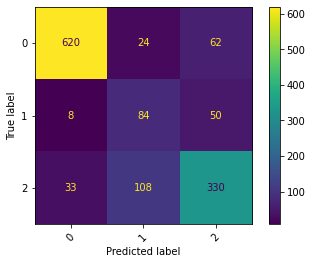

In [ ]:
# Multi Classification --- OverSampled
lr_pip_mlc.fit(X_train_ros,y_train_ros)

lr_pred_mlc= lr_pip_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, lr_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, lr_pred_mlc)
plot_confusion_matrix(lr_pip_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()

##### for external test

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       500
           1       0.62      0.84      0.71       500

    accuracy                           0.66      1000
   macro avg       0.69      0.66      0.65      1000
weighted avg       0.69      0.66      0.65      1000



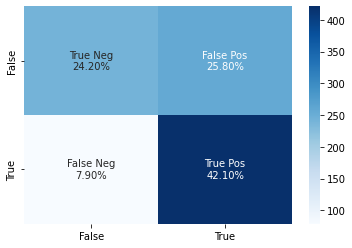

In [29]:
# mys
lr_pip_mys.fit(X_df_tok,y_mys_df)

lr_pred_mys= lr_pip_mys.predict(X_testext_tok)

print('Classification report:')
print(classification_report(y_mys_exttest, lr_pred_mys))
cf_matrix = confusion_matrix(y_mys_exttest, lr_pred_mys)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.35      0.50       525
           1       0.29      0.89      0.43       154

    accuracy                           0.47       679
   macro avg       0.60      0.62      0.47       679
weighted avg       0.77      0.47      0.49       679

Confusion matrix:


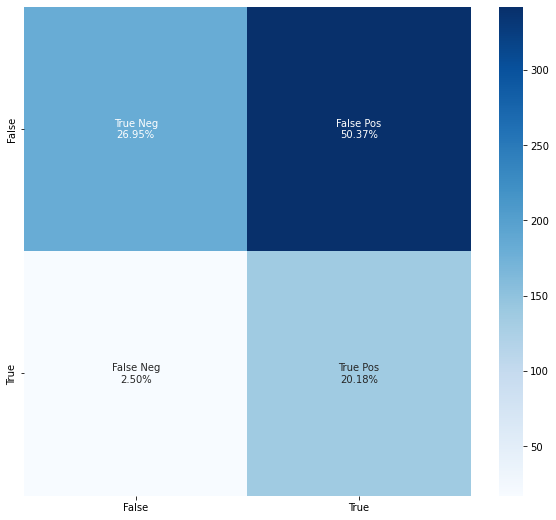

In [30]:
# agressive -- 2 consider just tweet that are class. as mys
lr_pip_agr.fit(X_df_tok,y_mys_df)

X_test_tok_agr= X_testext_tok[lr_pred_mys==1]

lr_pred_agr= lr_pip_agr.predict(X_test_tok_agr)

print('Classification report:')
print(classification_report(y_agr_exttest[lr_pred_mys==1], lr_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_exttest[lr_pred_mys==1], lr_pred_agr)
plot_cfmatrix(cf_matrix)

In [31]:
(0.65 + 0.47)/2

0.56

# Support Vector Machine (SVM)

In [ ]:
svc_pip= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2)),
                ("tfidf", TfidfTransformer()),
                ("svc",  LinearSVC(max_iter=300000))
                ])

In [ ]:
params_grid = {
  'tfidf__use_idf': (True, False),
  'tfidf__norm': ('l1', 'l2'),
  'svc__C' : np.logspace(-3, 2, 40),
  'svc__penalty' : ['l2'],
  'svc__loss' : ['hinge'],
  "selbestk__k" : [400, 450, 500, 550, 600, 650, 700]
}

In [ ]:
g_search = GridSearchCV(svc_pip, params_grid, cv=5, scoring = "f1_macro", verbose = 2)

g_search.fit(X_train_tok,y_mys_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.0s
[CV] END selbestk__k=40

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   7.6s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.5s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.7s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   1.3s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   3.6s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   1.5s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   0.5s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   8.0s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   0.9s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   0.8s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   4.2s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.9s
[CV] END selbestk__k=450, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   0.9s
[CV] END selbestk__k=500, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=500, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fdbd71eea70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC(max_iter=300000))]),
             param_grid={'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'svc__C': array([1.00000000e-03, 1.34339933e-03, 1.80472177e-03, 2.42446202e-03,
       3.25702066e-03, 4.37547938e-03, 5.87801607...
       1.19377664e+00, 1.60371874e+00, 2.15443469e+00, 2.89426612e+00,
       3.88815518e+00, 5.22334507e+00, 7.01703829e+00, 9.42668455e+00,
       1.26638017e+01, 1.70125428e+01, 2.28546386e+01, 3.07029063e+01,
       4.12462638e+01, 5.54102033e+01, 7.44380301e+01, 1.00000000e+02]),
                         'svc__loss': ['hinge'], 'svc__penalty': ['l2'],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf_

In [ ]:
print("Best Parameter Combination For Mys task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Mys task:
{'selbestk__k': 650, 'svc__C': 7.017038286703823, 'svc__loss': 'hinge', 'svc__penalty': 'l2', 'tfidf__norm': 'l1', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(svc_pip, params_grid, cv=5, scoring = "f1_macro", verbose = 2 )

g_search.fit(X_train_tok,y_agr_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.0s
[CV] END selbestk__k=400, svc__C=0.001, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.0s
[CV] END selbestk__k=40

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   7.1s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.4s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   3.1s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   3.0s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.2s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.3s
[CV] END selbestk__k=450, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   4.4s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   7.3s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.4s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   2.2s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.9s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   2.9s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.1s
[CV] END selbestk__k=500, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.7s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   7.3s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   2.4s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   7.0s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   3.5s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   3.3s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.1s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   2.7s
[CV] END selbestk__k=500, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   7.8s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.4s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   1.1s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.1s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   2.6s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.6s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.5s
[CV] END selbestk__k=550, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   8.2s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   2.6s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   0.7s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   0.9s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   0.8s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.4s
[CV] END selbestk__k=600, svc__C=74.43803013251681, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   3.1s
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   8.8s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   0.5s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=True; total time=   1.1s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.3s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   1.5s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.8s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l1, tfidf__use_idf=False; total time=   0.7s
[CV] END selbestk__k=650, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=True; total time=   9.0s
[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.6s
[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   2.1s
[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.4s
[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   1.0s
[CV] END selbestk__k=700, svc__C=100.0, svc__loss=hinge, svc__penalty=l2, tfidf__norm=l2, tfidf__use_idf=False; total time=   6.1s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fdbd71eea70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC(max_iter=300000))]),
             param_grid={'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'svc__C': array([1.00000000e-03, 1.34339933e-03, 1.80472177e-03, 2.42446202e-03,
       3.25702066e-03, 4.37547938e-03, 5.87801607...
       1.19377664e+00, 1.60371874e+00, 2.15443469e+00, 2.89426612e+00,
       3.88815518e+00, 5.22334507e+00, 7.01703829e+00, 9.42668455e+00,
       1.26638017e+01, 1.70125428e+01, 2.28546386e+01, 3.07029063e+01,
       4.12462638e+01, 5.54102033e+01, 7.44380301e+01, 1.00000000e+02]),
                         'svc__loss': ['hinge'], 'svc__penalty': ['l2'],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf_

In [ ]:
print("Best Parameter Combination For Agr task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Agr task:
{'selbestk__k': 700, 'svc__C': 3.888155180308085, 'svc__loss': 'hinge', 'svc__penalty': 'l2', 'tfidf__norm': 'l2', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(svc_pip, params_grid, cv=5, scoring = "f1_macro", n_jobs = 3, verbose = 2)

g_search.fit(X_train_tok,y_multiclass_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fdbd71eea70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', LinearSVC(max_iter=300000))]),
             n_jobs=3,
             param_grid={'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'svc__C': array([1.00000000e-03, 1.34339933e-03, 1.80472177e-03, 2.42446202e-03,
       3.25702066e-03, 4.37547938e-03, 5...
       1.19377664e+00, 1.60371874e+00, 2.15443469e+00, 2.89426612e+00,
       3.88815518e+00, 5.22334507e+00, 7.01703829e+00, 9.42668455e+00,
       1.26638017e+01, 1.70125428e+01, 2.28546386e+01, 3.07029063e+01,
       4.12462638e+01, 5.54102033e+01, 7.44380301e+01, 1.00000000e+02]),
                         'svc__loss': ['hinge'], 'svc__penalty': ['l2'],
                         'tfidf__norm': ('l1', 'l2'),
                  

In [ ]:
print("Best Parameter Combination For MultiClass task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For MultiClass task:
{'selbestk__k': 600, 'svc__C': 2.154434690031882, 'svc__loss': 'hinge', 'svc__penalty': 'l2', 'tfidf__norm': 'l2', 'tfidf__use_idf': True}


#### re train

In [ ]:
svc_pip_mys= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 650)),
                ("tfidf", TfidfTransformer()),
                ("svc",  LinearSVC(max_iter=300000, C= 7.01, loss = 'hinge', penalty = 'l2'))
                ])

svc_pip_agr = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 700)),
                ("tfidf", TfidfTransformer(use_idf = False, norm = 'l1')),
                ("svc", LinearSVC(max_iter=300000, C= 3.88, loss = 'hinge', penalty = 'l2'))
                ])

svc_pip_mlc = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 600)),
                ("tfidf", TfidfTransformer(use_idf = False)),
                ("svc", LinearSVC(max_iter=300000, C = 2.15, loss = 'hinge', penalty = 'l2'))
                ])

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       706
           1       0.86      0.87      0.87       613

    accuracy                           0.87      1319
   macro avg       0.87      0.87      0.87      1319
weighted avg       0.87      0.87      0.87      1319



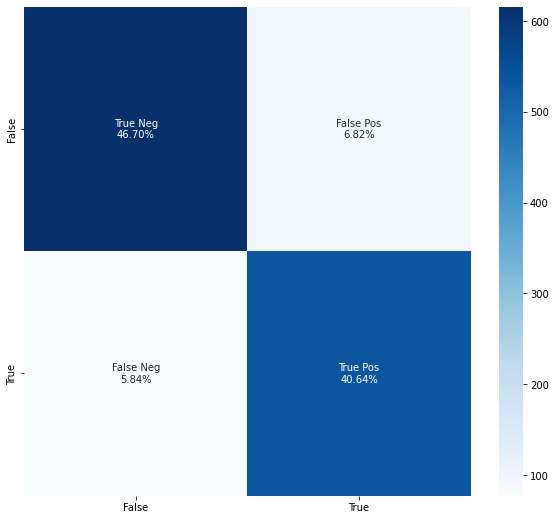

In [ ]:
# mys
svc_pip_mys.fit(X_train_tok,y_mys_train)

svc_pred_mys= svc_pip_mys.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, svc_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, svc_pred_mys)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       848
           1       0.74      0.75      0.74       471

    accuracy                           0.82      1319
   macro avg       0.80      0.80      0.80      1319
weighted avg       0.82      0.82      0.82      1319



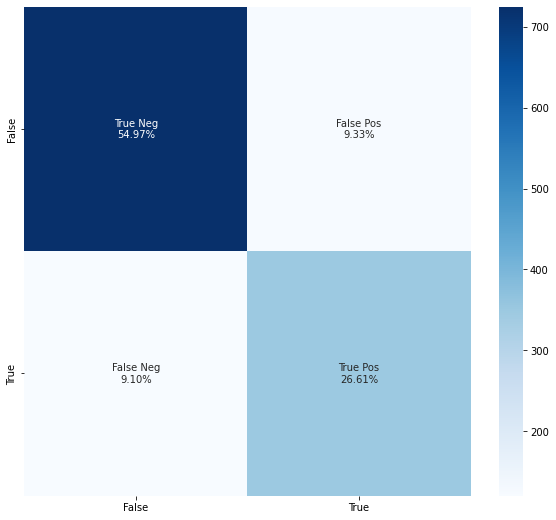

In [ ]:
# agressive -- 1 
svc_pip_agr.fit(X_train_tok,y_agr_train)

svc_pred_agr= svc_pip_agr.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_agr_val, svc_pred_agr))
cf_matrix = confusion_matrix(y_agr_val, svc_pred_agr)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       214
           1       0.75      0.82      0.79       412

    accuracy                           0.71       626
   macro avg       0.67      0.65      0.66       626
weighted avg       0.70      0.71      0.70       626

Confusion matrix:


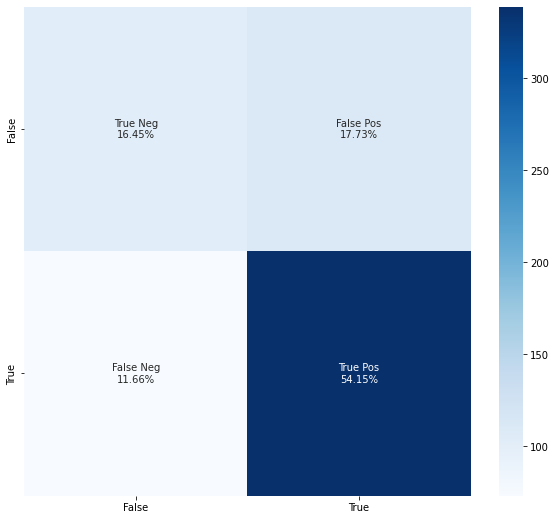

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
svc_pip_agr.fit(X_train_tok,y_agr_train)

X_val_tok_agr= X_val_tok[svc_pred_mys==1]

svc_pred_agr= svc_pip_agr.predict(X_val_tok_agr)

print('Classification report:')
print(classification_report(y_agr_val[svc_pred_mys==1], svc_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[svc_pred_mys==1], svc_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       706
           1       0.52      0.33      0.41       142
           2       0.73      0.81      0.77       471

    accuracy                           0.81      1319
   macro avg       0.72      0.68      0.69      1319
weighted avg       0.80      0.81      0.80      1319



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


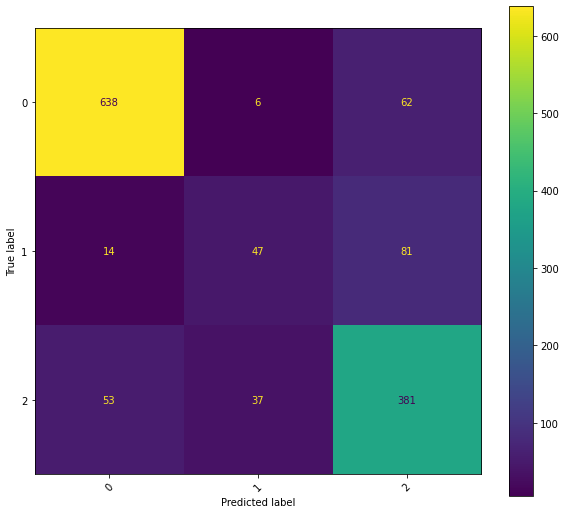

In [ ]:
# Multi Classification
svc_pip_mlc.fit(X_train_tok,y_multiclass_train)

svc_pred_mlc= svc_pip_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, svc_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, svc_pred_mlc)
plot_confusion_matrix(svc_pip_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()

# Decision Tree

In [ ]:
dt_pip = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2)),
                ("tfidf", TfidfTransformer()),
                ("dt", DecisionTreeClassifier())
                ])

In [ ]:
params_grid = {
      'tfidf__use_idf': (True, False),
      'tfidf__norm': ('l1', 'l2'),
      'dt__criterion' : ['gini', 'entropy'],
      'dt__max_depth': [None, 2, 5, 10, 15, 20, 25, 30, 35],
      'dt__min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35],
      'dt__min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35],
      'selbestk__k' : [400, 450, 500, 550, 600, 650, 700]}

In [ ]:
g_search = GridSearchCV(dt_pip, params_grid, cv=5, scoring = "f1_macro", verbose = 3)

g_search.fit(X_train_tok,y_mys_train)

Output streaming troncato alle ultime 5000 righe.
[CV 1/5] END dt__criterion=entropy, dt__max_depth=35, dt__min_samples_leaf=15, dt__min_samples_split=20, selbestk__k=500, tfidf__norm=l1, tfidf__use_idf=True;, score=0.824 total time=   0.0s
[CV 2/5] END dt__criterion=entropy, dt__max_depth=35, dt__min_samples_leaf=15, dt__min_samples_split=20, selbestk__k=500, tfidf__norm=l1, tfidf__use_idf=True;, score=0.845 total time=   0.0s
[CV 3/5] END dt__criterion=entropy, dt__max_depth=35, dt__min_samples_leaf=15, dt__min_samples_split=20, selbestk__k=500, tfidf__norm=l1, tfidf__use_idf=True;, score=0.828 total time=   0.0s
[CV 4/5] END dt__criterion=entropy, dt__max_depth=35, dt__min_samples_leaf=15, dt__min_samples_split=20, selbestk__k=500, tfidf__norm=l1, tfidf__use_idf=True;, score=0.846 total time=   0.0s
[CV 5/5] END dt__criterion=entropy, dt__max_depth=35, dt__min_samples_leaf=15, dt__min_samples_split=20, selbestk__k=500, tfidf__norm=l1, tfidf__use_idf=True;, score=0.833 total time=   

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fbc21854050>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_split': [2, 5, 10, 15, 20, 25, 30,
                                                   35],
                         'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro', verbose=3)

In [ ]:
print("Best Parameter Combination For Mys task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Mys task:
{'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 30, 'selbestk__k': 550, 'tfidf__norm': 'l1', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(dt_pip, params_grid, cv=5, scoring = "f1_macro")

g_search.fit(X_train_tok,y_agr_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fbc21854050>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_split': [2, 5, 10, 15, 20, 25, 30,
                                                   35],
                         'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro')

In [ ]:
print("Best Parameter Combination For Agr task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Agr task:
{'dt__criterion': 'entropy', 'dt__max_depth': 25, 'dt__min_samples_leaf': 15, 'dt__min_samples_split': 5, 'selbestk__k': 600, 'tfidf__norm': 'l2', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(dt_pip, params_grid, cv=5, scoring = "f1_macro")

g_search.fit(X_train_tok,y_multiclass_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7fbc21854050>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35],
                         'dt__min_samples_split': [2, 5, 10, 15, 20, 25, 30,
                                                   35],
                         'selbestk__k': [400, 450, 500, 550, 600, 650, 700],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro')

In [ ]:
print("Best Parameter Combination For MultiClass task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For MultiClass task:
{'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10, 'selbestk__k': 600, 'tfidf__norm': 'l1', 'tfidf__use_idf': False}


In [ ]:
dt_pip_mys= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 500)),
                ("tfidf", TfidfTransformer(norm ='l1', use_idf = False)),
                ("dt",  DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 30))
                ])

dt_pip_agr = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 600)),
                ("tfidf", TfidfTransformer(use_idf = False)),
                ("dt", DecisionTreeClassifier(criterion = 'entropy', max_depth = 25, min_samples_leaf = 15, min_samples_split = 5))
                ])

dt_pip_mlc = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 600)),
                ("tfidf", TfidfTransformer(norm ='l1', use_idf = False)),
                ("dt", DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 1, min_samples_split = 10))
                ])

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       706
           1       0.83      0.91      0.86       613

    accuracy                           0.87      1319
   macro avg       0.87      0.87      0.87      1319
weighted avg       0.87      0.87      0.87      1319



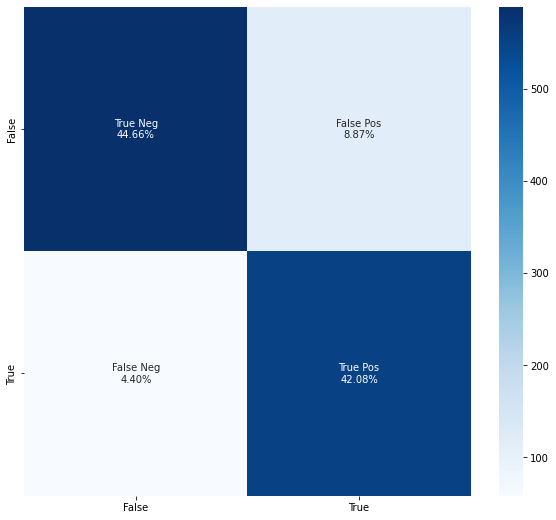

In [ ]:
# mys
dt_pip_mys.fit(X_train_tok,y_mys_train)

dt_pred_mys= dt_pip_mys.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, dt_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, dt_pred_mys)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       848
           1       0.66      0.87      0.75       471

    accuracy                           0.80      1319
   macro avg       0.79      0.81      0.79      1319
weighted avg       0.82      0.80      0.80      1319



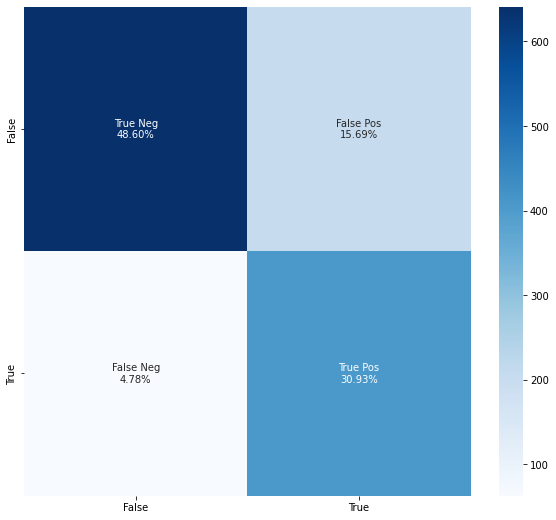

In [ ]:
# agressive -- 1 
dt_pip_agr.fit(X_train_tok,y_agr_train)

dt_pred_agr= dt_pip_agr.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_agr_val, dt_pred_agr))
cf_matrix = confusion_matrix(y_agr_val, dt_pred_agr)

plot_cfmatrix(cf_matrix)

Classification report:
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.23      0.34       245
           1       0.68      0.94      0.79       427

    accuracy                           0.68       672
   macro avg       0.68      0.58      0.57       672
weighted avg       0.68      0.68      0.63       672

Confusion matrix:


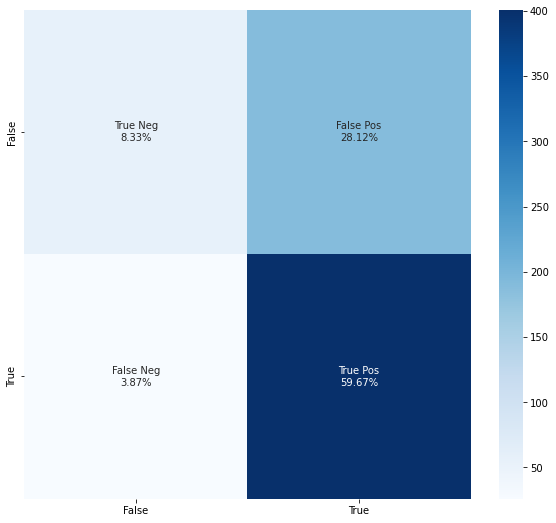

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
dt_pip_agr.fit(X_train_tok,y_agr_train)

X_val_tok_agr= X_val_tok[dt_pred_mys==1]

dt_pred_agr= dt_pip_agr.predict(X_val_tok_agr)

print('Classification report:')
print('Classification report:')
print(classification_report(y_agr_val[dt_pred_mys==1], dt_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[dt_pred_mys==1], dt_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       706
           1       0.46      0.30      0.36       142
           2       0.65      0.82      0.73       471

    accuracy                           0.77      1319
   macro avg       0.68      0.65      0.65      1319
weighted avg       0.77      0.77      0.76      1319



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


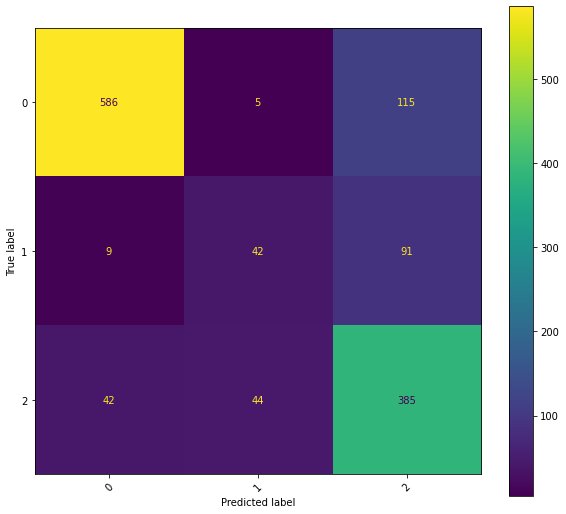

In [ ]:
# Multi Classification
dt_pip_mlc.fit(X_train_tok,y_multiclass_train)

dt_pred_mlc= dt_pip_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, dt_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, dt_pred_mlc)
plot_confusion_matrix(dt_pip_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()

# Random Forest

In [ ]:
params_grid = {
      'tfidf__use_idf': (True, False),
      'tfidf__norm': ('l1', 'l2'),
      'rf__criterion' : ['gini', 'entropy'],
      'rf__max_depth': [None, 2, 5, 10, 15, 20, 25],
      'rf__min_samples_split': [2, 5, 10, 15, 20, 25],
      'rf__min_samples_leaf': [1, 5, 10, 15, 20, 25],
      'rf__n_estimators' : [5, 10, 15, 20, 25],
      'selbestk__k' : [400, 450, 500, 550, 600]}

In [ ]:
rf_pip = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2)),
                ("tfidf", TfidfTransformer()),
                ("rf", RandomForestClassifier())
                ])

In [ ]:
g_search = GridSearchCV(rf_pip, params_grid, cv=3, scoring = "f1_macro", verbose = 3)

g_search.fit(X_train_tok,y_mys_train)

Output streaming troncato alle ultime 5000 righe.
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.845 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.831 total time=   0.0s
[CV 1/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.826 total time=   0.0s
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.853 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7f02d4302a70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 5, 10, 15, 20, 25],
                         'rf__min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'rf__min_samples_split': [2, 5, 10, 15, 20, 25],
                         'rf__n_estimators': [5, 10, 15, 20, 25],
                         'selbestk__k': [400, 450, 500, 550, 600],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro', verbose=3)

In [ ]:
print("Best Parameter Combination For Mys task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Mys task:
{'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 15, 'rf__n_estimators': 20, 'selbestk__k': 600, 'tfidf__norm': 'l1', 'tfidf__use_idf': True}


In [ ]:
g_search = GridSearchCV(rf_pip, params_grid, cv=3, scoring = "f1_macro", verbose = 3)

g_search.fit(X_train_tok,y_agr_train)

Output streaming troncato alle ultime 5000 righe.
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.759 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.617 total time=   0.0s
[CV 1/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.718 total time=   0.0s
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.714 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7f02d4302a70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 5, 10, 15, 20, 25],
                         'rf__min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'rf__min_samples_split': [2, 5, 10, 15, 20, 25],
                         'rf__n_estimators': [5, 10, 15, 20, 25],
                         'selbestk__k': [400, 450, 500, 550, 600],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro', verbose=3)

In [ ]:
print("Best Parameter Combination For Agr task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For Agr task:
{'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 20, 'rf__n_estimators': 25, 'selbestk__k': 550, 'tfidf__norm': 'l1', 'tfidf__use_idf': False}


In [ ]:
g_search = GridSearchCV(rf_pip, params_grid, cv=3, scoring = "f1_macro", verbose = 3)

g_search.fit(X_train_tok,y_multiclass_train)

Output streaming troncato alle ultime 5000 righe.
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.526 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l1, tfidf__use_idf=False;, score=0.556 total time=   0.0s
[CV 1/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.509 total time=   0.0s
[CV 2/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, rf__n_estimators=10, selbestk__k=550, tfidf__norm=l2, tfidf__use_idf=True;, score=0.510 total time=   0.0s
[CV 3/3] END rf__criterion=entropy, rf__max_depth=25, rf__min_samples_leaf=15, rf__min_samples_split=5, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('selbestk',
                                        SelectKBest(score_func=<function chi2 at 0x7f291038ea70>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 5, 10, 15, 20, 25],
                         'rf__min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'rf__min_samples_split': [2, 5, 10, 15, 20, 25],
                         'rf__n_estimators': [5, 10, 15, 20, 25],
                         'selbestk__k': [400, 450, 500, 550, 600],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False)},
             scoring='f1_macro', verbose=3)

In [ ]:
print("Best Parameter Combination For MultiClass task:")
best_hyp = g_search.best_params_
print(best_hyp)

Best Parameter Combination For MultiClass task:
{'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 20, 'rf__n_estimators': 25, 'selbestk__k': 400, 'tfidf__norm': 'l2', 'tfidf__use_idf': False}


In [ ]:
rf_pip_mys= Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 600)),
                ("tfidf", TfidfTransformer(norm ='l1')),
                ("rf",  RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = None, min_samples_split = 15, min_samples_leaf= 1))
                ])

rf_pip_agr = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 550)),
                ("tfidf", TfidfTransformer(use_idf = False, norm = 'l1')),
                ("rf", RandomForestClassifier(n_estimators = 25 ,criterion = 'entropy', max_depth = 25, min_samples_split = 20, min_samples_leaf= 1))
                ])

rf_pip_mlc = Pipeline([
                ("selbestk", SelectKBest(score_func = chi2, k = 400)),
                ("tfidf", TfidfTransformer(use_idf = False)),
                ("rf", RandomForestClassifier(n_estimators = 25 ,criterion = 'gini' , max_depth = None ,min_samples_split = 20 ,min_samples_leaf= 1))
                ])

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       471
           1       0.83      0.94      0.88       409

    accuracy                           0.88       880
   macro avg       0.88      0.89      0.88       880
weighted avg       0.89      0.88      0.88       880



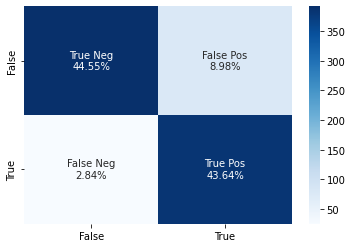

In [ ]:
# mys
rf_pip_mys.fit(X_train_tok,y_mys_train)

rf_pred_mys= rf_pip_mys.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_mys_val, rf_pred_mys))
cf_matrix = confusion_matrix(y_mys_val, rf_pred_mys)

plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       566
           1       0.69      0.82      0.75       314

    accuracy                           0.80       880
   macro avg       0.79      0.80      0.79       880
weighted avg       0.81      0.80      0.80       880



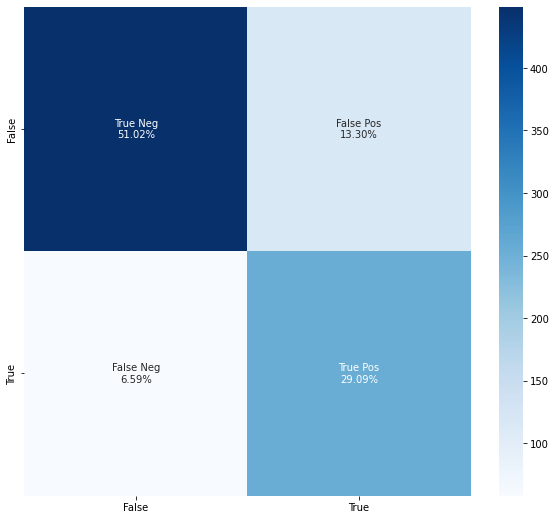

In [ ]:
# agressive -- 1 
rf_pip_agr.fit(X_train_tok,y_agr_train)

rf_pred_agr= rf_pip_agr.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_agr_val, rf_pred_agr))
cf_matrix = confusion_matrix(y_agr_val, rf_pred_agr)

plot_cfmatrix(cf_matrix)

Classification report:
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.34      0.45       171
           1       0.70      0.90      0.79       292

    accuracy                           0.69       463
   macro avg       0.68      0.62      0.62       463
weighted avg       0.68      0.69      0.66       463

Confusion matrix:


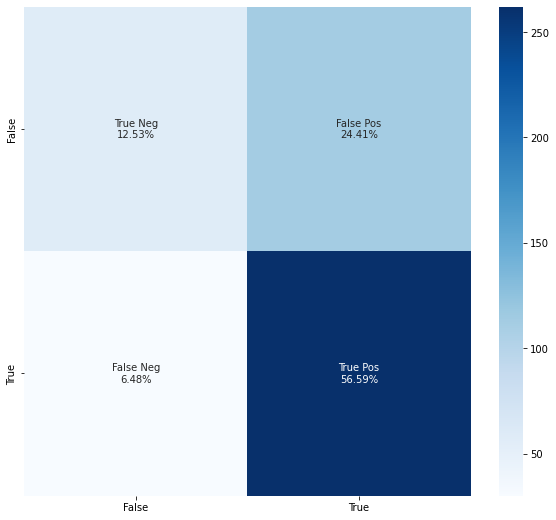

In [ ]:
# agressive -- 2 consider just tweet that are class. as mys
rf_pip_agr.fit(X_train_tok,y_agr_train)

X_val_tok_agr= X_val_tok[rf_pred_mys==1]

rf_pred_agr= rf_pip_agr.predict(X_val_tok_agr)

print('Classification report:')
print('Classification report:')
print(classification_report(y_agr_val[rf_pred_mys==1], rf_pred_agr))

print('Confusion matrix:')
cf_matrix = confusion_matrix(y_agr_val[rf_pred_mys==1], rf_pred_agr)
plot_cfmatrix(cf_matrix)

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       471
           1       0.52      0.36      0.42        95
           2       0.67      0.79      0.73       314

    accuracy                           0.78       880
   macro avg       0.70      0.67      0.68       880
weighted avg       0.78      0.78      0.77       880



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


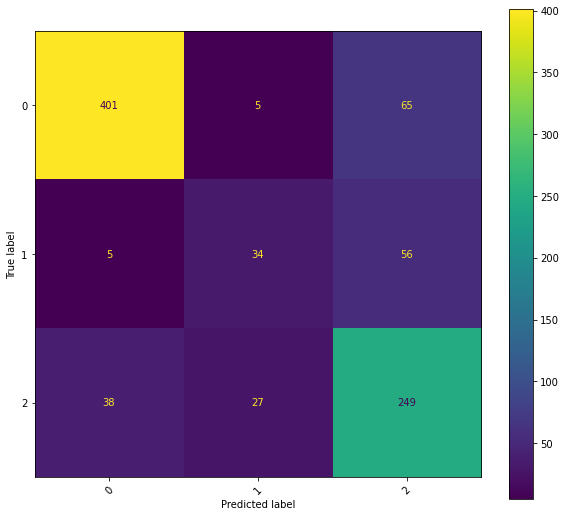

In [ ]:
# Multi Classification
rf_pip_mlc.fit(X_train_tok,y_multiclass_train)

rf_pred_mlc= rf_pip_mlc.predict(X_val_tok)

print('Classification report:')
print(classification_report(y_multiclass_val, rf_pred_mlc))

cf_matrix = confusion_matrix(y_multiclass_val, rf_pred_mlc)
plot_confusion_matrix(rf_pip_mlc, X_val_tok, y_multiclass_val)  
plt.xticks(rotation=45)
plt.show()